<a href="https://colab.research.google.com/github/bogard75/bogard75.github.io/blob/master/ecos_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from bs4 import BeautifulSoup
import requests
import datetime as dt
import numpy as np
import pandas as pd

In [0]:
#url = 'http://ecos.bok.or.kr/api/StatisticTableList/HSR8HN3LD76UPXWLXEDX/xml/kr/1/10/'
#url = 'http://ecos.bok.or.kr/api/StatisticMeta/HSR8HN3LD76UPXWLXEDX/xml/kr/1/10/경제심리/'
# 통계코드검색
# 3. 예금/대출금/기타금융
#    3.5 지역별 여수신
#        3.5.1 예금은행 수신 및 여신
#              3.5.1.1 예금은행 지역별예금(말잔)[088Y002]
#                      원화예금[100000]
#                      요구불예금[110000]
#                      저축성예금[120000]
#              3.5.1.2 예금은행 지역별대출금(말잔)[088Y003]
#                      원화대출금[200000]
#                      시설자금[20Y000]
#                      운전자금[20X000]



api_key = 'HSR8HN3LD76UPXWLXEDX'
url = 'http://ecos.bok.or.kr/api/StatisticSearch/{0}/xml/kr/1/100'.format(api_key) 

#ecos_request_data(url, '088Y002/MM/201101/202001/100000/X00')
def ecos_request_data(url, item):
    ret = requests.get('/'.join([url, item]))
    xml = BeautifulSoup(ret.text, 'xml')
    lst = [[r.find('TIME').contents[0], r.find('DATA_VALUE').contents[0]] for r in xml.find_all('row')]

    data_value = item.split('/')[-1]
    df = pd.DataFrame(lst, columns=['YYYYMM', data_value])
    df['YYYYMM'] = pd.to_datetime(df['YYYYMM'], format='%Y%m', errors='coerce')
    df[data_value] = pd.to_numeric(df[data_value], errors='coerce')
    df = df.set_index('YYYYMM')
    return df



In [0]:
dep_X00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/X00')  # 예금은행지역별예금말잔/원화예금/전국
dep_A00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/A00')  # 예금은행지역별예금말잔/원화예금/서울
dep_D00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/D00')  # 예금은행지역별예금말잔/원화예금/인천
dep_L00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/L00')  # 예금은행지역별예금말잔/원화예금/경기
dep_B00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/B00')  # 예금은행지역별예금말잔/원화예금/부산
dep_G00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/G00')  # 예금은행지역별예금말잔/원화예금/울산
dep_T00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/T00')  # 예금은행지역별예금말잔/원화예금/경남
dep_C00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/C00')  # 예금은행지역별예금말잔/원화예금/대구
dep_S00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/S00')  # 예금은행지역별예금말잔/원화예금/경북

deposit = pd.concat([dep_A00,dep_D00,dep_L00,dep_B00,dep_G00,dep_T00,dep_C00,dep_S00],axis=1)

In [0]:
#deposit['수도권']=deposit['A00']+deposit['D00']+deposit['L00']
#deposit['부울경']=deposit['B00']+deposit['G00']+deposit['T00']
#deposit['대경권']=deposit['C00']+deposit['S00']

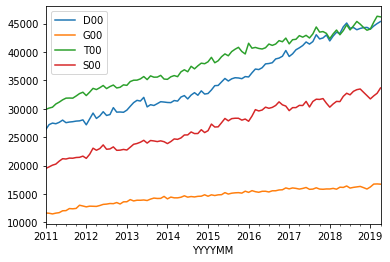

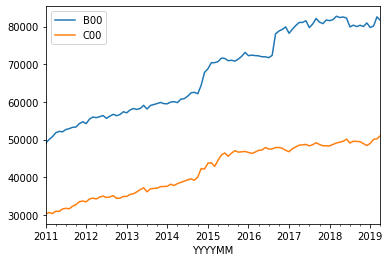

In [227]:
deposit.drop(columns=['A00','L00','B00','C00']).plot()
deposit[['B00','C00']].plot()

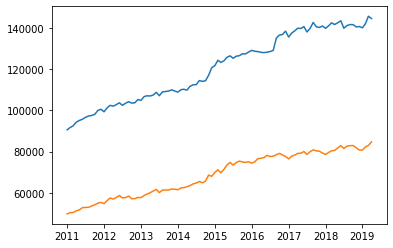

In [179]:
import matplotlib.pyplot as plt

#plt.plot(예금은행지역별예금말잔_원화예금_수도권)
plt.plot(예금은행지역별예금말잔_원화예금_부울경)
plt.plot(예금은행지역별예금말잔_원화예금_대경권)

NameError: ignored

In [0]:
ln_X00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/X00')  # 예금은행지역별예금말잔/원화예금/전국
ln_A00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/A00')  # 예금은행지역별예금말잔/원화예금/서울
ln_D00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/D00')  # 예금은행지역별예금말잔/원화예금/인천
ln_L00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/L00')  # 예금은행지역별예금말잔/원화예금/경기
ln_B00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/B00')  # 예금은행지역별예금말잔/원화예금/부산
ln_G00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/G00')  # 예금은행지역별예금말잔/원화예금/울산
ln_T00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/T00')  # 예금은행지역별예금말잔/원화예금/경남
ln_C00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/C00')  # 예금은행지역별예금말잔/원화예금/대구
ln_S00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/S00')  # 예금은행지역별예금말잔/원화예금/경북

loan = pd.concat([ln_A00,ln_D00,ln_L00,ln_B00,ln_G00,ln_T00,ln_C00,ln_S00],axis=1)

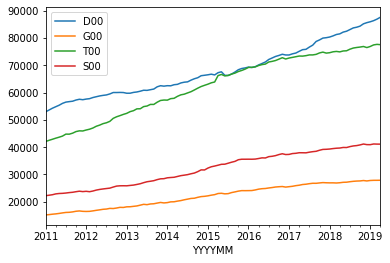

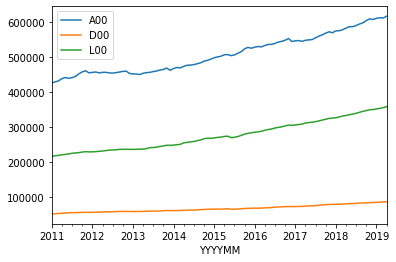

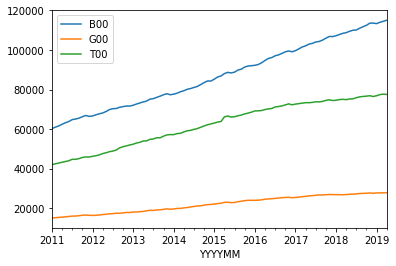

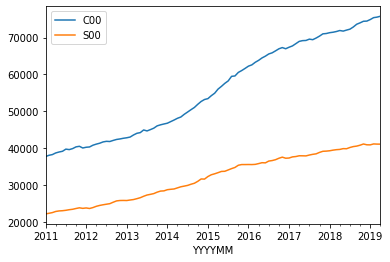

In [233]:
loan.drop(columns=['A00','L00','B00','C00']).plot()
loan[['A00','D00','L00']].plot()
loan[['B00','G00','T00']].plot()
loan[['C00','S00']].plot()


In [203]:
 
  .rename(columns={0:'SEOUL',1:'INCHEON',2:'KYUNGKI',3:'BUSAN',4:'ULSAN',5:'KYUNGNAM',6:'DAEGU',7:'KYUNGBUK'})

,Value,Value,Value,Value,Value,Value,Value,Value
YYYYMM,,,,,,,,
2011-01-01,483595.0,26341.4,118747.7,49026.7,11670.9,29898.1,30278.2,19502.3
2011-02-01,492042.1,27221.7,120523.5,50003.9,11624.6,30133.8,30637.9,19785.8
2011-03-01,486369.2,27490.6,122370.8,50744.8,11504.6,30289.5,30383.5,20087.2
2011-04-01,488183.4,27378.7,123342.4,51812.2,11642.4,30853.0,30996.5,20276.1
2011-05-01,486636.1,27628.1,123272.3,52196.3,11729.8,31182.4,30941.1,20795.3
...,...,...,...,...,...,...,...,...
2018-12-01,728762.8,44338.0,206787.8,80983.6,15886.4,43841.2,48437.4,32334.2
2019-01-01,717318.2,44028.9,206126.0,79774.1,16247.5,44050.1,48996.8,31749.6
2019-02-01,723268.8,44578.6,207995.7,80197.0,16755.4,45255.9,50085.2,32284.8


In [196]:
dep_A00.rename(columns={'Value':'A00'})

,A00
YYYYMM,
2011-01-01,483595.0
2011-02-01,492042.1
2011-03-01,486369.2
2011-04-01,488183.4
2011-05-01,486636.1
...,...
2018-12-01,728762.8
2019-01-01,717318.2
2019-02-01,723268.8
